In [18]:
# Dependencies
# Pandas
import pandas as pd
from matplotlib import pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine
from config import pwd

In [15]:
# Create Engine

engine = create_engine('postgresql://postgres:'+ pwd + '@localhost:5432/pewlett_hackard_emp_db')
conn = engine.connect()

In [16]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM employees e\
                   INNER JOIN salaries s ON\
                   e.emp_no = s.emp_no", conn)
data.head()
# emp_info_df = data.drop(columns=['emp_no'])
# emp_info_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary
0,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,78228
1,10010,e0002,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,72488
2,10011,s0001,1953-11-07,Mary,Sluis,F,1990-01-22,10011,42365
3,10013,s0002,1963-06-07,Eberhardt,Terkki,M,1985-10-20,10013,40000
4,10017,s0001,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,71380


In [50]:
# salary_count = data.loc[data['salary'] == 40000].count()
# salary_count

salary_count = data[(data["salary"] >= 40000) &
                    (data["salary"] <=49999)].count()
salary_count

emp_no          158465
emp_title_id    158465
birth_date      158465
first_name      158465
last_name       158465
sex             158465
hire_date       158465
emp_no          158465
salary          158465
dtype: int64

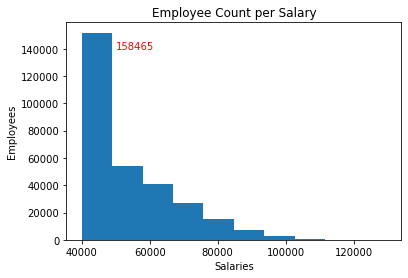

In [54]:
plt.hist(data["salary"], 10, density=False, label="Salary")
plt.xlabel("Salaries")
plt.ylabel("Employees")
plt.title("Employee Count per Salary")
plt.annotate(158465,(50000,140000),fontsize=10,color="red")
plt.savefig("Emp Count-.png")